## xcube Data Store Framework - CCI Open Data Portal

*Please checkout the general introduction to xcube data stores in the Jupyter Notebook [Getting Started](./1_getting_started.ipynb) before jumping into this notebook :)* 

This notebook provides a walk-through demonstrating how to use xcube and the xcube plugin for the [Open Data Portal](https://climate.esa.int/en/odp/#/dashboard) of the [ESA Climate Change Initiative](https://climate.esa.int/en/esa-climate/esa-cci/) (CCI) to read and explore CCI data.


In order to run this notebook you need to install the `xcube_cci` plugin. You may do so by executing the following line in your terminal: 

```
$  conda install -c conda-forge xcube-cci
```

Or you can install `xcube_cci` from sources by following the instructions on https://github.com/dcs4cop/xcube-cci.


In [1]:
# CCI Data Store requires asyncio. In order to work in Notebooks, we need to do the following:
from xcube.util.ipython import enable_asyncio
enable_asyncio()

In [2]:
# mandatory imports
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Utilities for notebook visualization
from IPython.display import JSON
import shapely.geometry
import IPython.display
from IPython.display import JSON
import matplotlib.pyplot as plt

Configure matplotlib to display graphs inline directly in the notebook and set a sensible default figure size.

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 16,8

Check whether the `cciodp` store is among the available stores, if not please follow the installation information from the top of this notebook. 

In [4]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

Usually we need more information to get the actual data store object. Which data store parameters are available for `cciodp`?

In [5]:
get_data_store_params_schema('cciodp')

Provide mandatory parameters to instantiate the store class:

In [6]:
store = new_data_store('cciodp')
store

Which datasets are provided? (the list may contain both gridded and vector datasets):

We may ask for a specific dataset ...

In [7]:
store.has_data('esacci.OC.5-days.L3S.CHLOR_A.multi-sensor.multi-platform.MERGED.3-1.geographic')

True

... but in many cases we want to query for certain criteria. How can we do that?

In [8]:
store.get_search_params_schema()

Now search, let's search for sea surface temperature data (SST) with a daily frequency: 

In [14]:
iterator = store.search_data(cci_attrs=dict(ecv='SST', frequency='day'))
JSON([item.to_dict() for item in iterator])

/home/tejas/miniconda3/envs/xcube/lib/python3.9/site-packages/xcube_cci/cciodp.py:1226: CciOdpWarning: Variable "field_name" has no fill value, cannot set one. For parts where no data is available you will see random values. This is usually the case when data is missing for a time step.
  warnings.warn(f'Variable "{fixed_key}" has no fill value, '


<IPython.core.display.JSON object>

Which parameters must be passsed or are available to open the dataset? 

In [10]:
store.get_open_data_params_schema('esacci.SST.day.L4.SSTdepth.multi-sensor.multi-platform.OSTIA.1-1.r1')

There are no required parameters, so we can decide what parameters we would like to provide them to open a dataset:

In [11]:
dataset = store.open_data('esacci.SST.day.L4.SSTdepth.multi-sensor.multi-platform.OSTIA.1-1.r1', 
                          variable_names=['analysed_sst'],
                          time_range=['2008-07-01','2008-07-10'])

dataset

<xarray.Dataset>
Dimensions:       (time: 10, lat: 3600, lon: 7200, bnds: 2)
Coordinates:
  * lat           (lat) float32 -89.97 -89.93 -89.88 ... 89.88 89.93 89.97
    lat_bnds      (lat, bnds) float32 dask.array<chunksize=(3600, 2), meta=np.ndarray>
  * lon           (lon) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
    lon_bnds      (lon, bnds) float32 dask.array<chunksize=(7200, 2), meta=np.ndarray>
  * time          (time) datetime64[ns] 2008-07-01T12:00:00 ... 2008-07-10T12...
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(10, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    analysed_sst  (time, lat, lon) float32 dask.array<chunksize=(1, 900, 1800), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.SST.day.L4.SSTdepth.multi-sensor.multi-pl...
    date_created:            2022-05-05T11:21:03.555277
    processing_level:        L4
    time_coverage_start:     2008-07-01T00:00:00
    time_coverage_end:       2008-07-11T00:00:00
    time_coverage_duration:  P10DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

Plot one time stamp of the dataset for a analysed_sst in order to take a brief look at the dataset:  

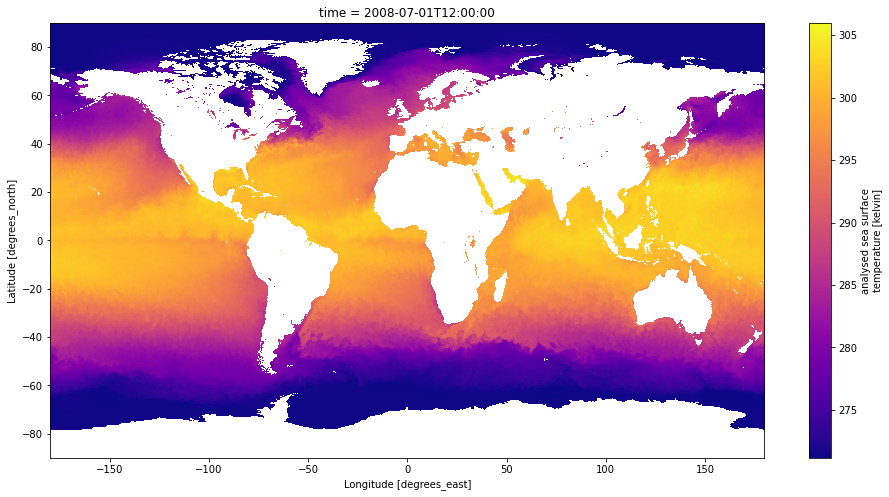

In [13]:
dataset.analysed_sst.isel(time=0).plot.imshow(cmap='plasma')